In [1]:
# OID = 2226832103641712942
# OID = 1053090246851297631
# OID = 2226880482153333268
# OID = 2226928860664971934
# OID = 2226792521223122099
# OID = 2528742163131035981
# OID = 2226748540758019375
OID = 2226748540758003742

In [2]:
%pip install lsdb

DEPRECATION: lsst-analysis-ap g7299995a7b+825fa8b952 has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of lsst-analysis-ap or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: lsst-display-astrowidgets g07dc498a13+fb7087bc2f has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of lsst-display-astrowidgets or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: lsst-drp-pipe g3017752cde+f3a893b7ce has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of lsst-drp-pipe or contact the author to suggest th

In [3]:
from pathlib import Path

release = "w_2025_04"
hats_path = Path("/sdf/data/rubin/shared/lsdb_commissioning/DASH/") / release / "hats"
# list dir
print(list(map(str, hats_path.iterdir())))

comcam_obj = hats_path / "object"
comcam_src = hats_path / "forcedSource"

['/sdf/data/rubin/shared/lsdb_commissioning/DASH/w_2025_04/hats/diaSource', '/sdf/data/rubin/shared/lsdb_commissioning/DASH/w_2025_04/hats/source', '/sdf/data/rubin/shared/lsdb_commissioning/DASH/w_2025_04/hats/diaForcedSource', '/sdf/data/rubin/shared/lsdb_commissioning/DASH/w_2025_04/hats/object', '/sdf/data/rubin/shared/lsdb_commissioning/DASH/w_2025_04/hats/diaObject', '/sdf/data/rubin/shared/lsdb_commissioning/DASH/w_2025_04/hats/forcedSource']


In [4]:
# Load the Forced Source + MJD Table
from lsdb import read_hats

filters = [("objectId", "==", OID)]

obj = read_hats(
    comcam_obj,
    columns=["objectId", "coord_ra", "coord_dec"],
    filters=filters,
)
src_flat = read_hats(
    comcam_src,
    # columns=[
    #     "objectId", 
    #     "coord_ra", "coord_dec",
    #     "band",
    #     "midpointMJDTai",
    #     "psfFlux", "psfFluxErr", "psfFlux_flag",
    #     "forcedSourceId",
    #     "detector",
    #     "visit",
    # ],
    filters=filters,
)
src_nested = obj.join_nested(
    src_flat,
    nested_column_name="lc",
    left_on="objectId",
    right_on="objectId",
)
src_nested

/sdf/data/rubin/user/kostya/linccf/.venv/lib/python3.11/site-packages/lsdb/dask/join_catalog_data.py:332: RuntimeWarning: Right catalog does not have a margin cache. Results may be incomplete and/or inaccurate.
  warnings.warn(


,objectId,coord_ra,coord_dec,lc
npartitions=161,,,,
"Order: 5, Pixel: 32",int64[pyarrow],double[pyarrow],double[pyarrow],"nested<forcedSourceId: [int64], parentObjectId..."
"Order: 7, Pixel: 544",...,...,...,...
...,...,...,...,...
"Order: 6, Pixel: 35970",...,...,...,...
"Order: 6, Pixel: 35971",...,...,...,...


In [7]:
import pandas as pd; pd.set_option('display.max_columns', None)
ndf = src_nested.compute()
ndf = ndf.query(
    "~lc.psfFlux_flag"
    " and ~lc.pixelFlags_suspect"
    " and ~lc.pixelFlags_saturated"
    " and ~lc.pixelFlags_cr"
    " and ~lc.pixelFlags_bad"
)
display(ndf)
data = ndf.iloc[0]
display(data)
data.lc.sort_values("midpointMJDTai")

,objectId,coord_ra,coord_dec,lc
_healpix_29,,,,
2528713681190810367,2226748540758003742,53.211946,-28.201129,forcedSourceId parentObjectId coor...


objectId                                   2226748540758003742
coord_ra                                             53.211946
coord_dec                                           -28.201129
lc                    forcedSourceId  parentObjectId   coor...
Name: 2528713681190810367, dtype: object

,forcedSourceId,parentObjectId,coord_ra,coord_dec,visit,detector,band,psfFlux,psfFluxErr,psfFlux_flag,psfDiffFlux,psfDiffFluxErr,psfDiffFlux_flag,localPhotoCalib,localPhotoCalib_flag,localPhotoCalibErr,localWcs_flag,localWcs_CDMatrix_2_1,localWcs_CDMatrix_1_1,localWcs_CDMatrix_1_2,localWcs_CDMatrix_2_2,localBackground_instFlux,localBackground_instFluxErr,pixelFlags_edge,pixelFlags_interpolated,pixelFlags_saturated,pixelFlags_cr,pixelFlags_bad,pixelFlags_suspect,pixelFlags_interpolatedCenter,pixelFlags_saturatedCenter,pixelFlags_crCenter,pixelFlags_suspectCenter,invalidPsfFlag,tract,patch,detect_isPrimary,detect_isTractInner,detect_isPatchInner,midpointMJDTai,psfMag,psfMagErr,Norder,Dir,Npix
31,190875481661246618,0,53.211946,-28.201129,2024110800245,3,i,1.231204e+06,1502.794593,False,-10215.094628,1379.090885,False,1.0,False,0.000500,False,9.466575e-07,2.161812e-07,9.465161e-07,-2.159808e-07,19.383564,34.243976,False,False,False,False,False,False,False,False,False,False,False,5063,4,False,True,True,60623.258521,16.174175,0.001325,10,9190000,9199406
32,190875482734988458,0,53.211946,-28.201129,2024110800246,3,r,7.285164e+05,977.503827,False,-8167.646782,939.645480,False,1.0,False,0.000411,False,9.469244e-07,2.162188e-07,9.467589e-07,-2.160306e-07,10.976575,22.369540,False,False,False,False,False,False,False,False,False,False,False,5063,4,False,True,True,60623.259329,16.743902,0.001457,10,9190000,9199406
142,190875485960405994,0,53.211946,-28.201129,2024110800249,4,i,1.244883e+06,1538.466081,False,-8220.005464,1400.887063,False,1.0,False,0.000525,False,9.464770e-07,2.154589e-07,9.464939e-07,-2.154689e-07,22.437495,34.956806,False,False,False,False,False,False,False,False,False,False,False,5063,4,False,True,True,60623.261307,16.162179,0.001342,10,9190000,9199406
143,190875487034147831,0,53.211946,-28.201129,2024110800250,4,r,7.272701e+05,967.248300,False,-8784.822385,909.510417,False,1.0,False,0.000458,False,9.467371e-07,2.154866e-07,9.467329e-07,-2.155400e-07,12.466462,22.198753,False,False,False,False,False,False,False,False,False,False,False,5063,4,False,True,True,60623.262128,16.745761,0.001444,10,9190000,9199406
475,190875490267957082,0,53.211946,-28.201129,2024110800253,7,i,1.229895e+06,1481.589991,False,481.294398,1350.113111,False,1.0,False,0.000500,False,9.470255e-07,2.137287e-07,9.474297e-07,-2.138382e-07,20.121659,34.404918,False,False,False,False,False,False,False,False,False,False,False,5063,4,False,True,True,60623.264086,16.175330,0.001308,10,9190000,9199406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,192001576993292631,0,53.211946,-28.201129,2024121000427,4,g,2.189475e+05,1298.944573,False,2415.917753,1214.067088,False,1.0,False,0.002086,False,8.913951e-07,3.844274e-07,8.915448e-07,-3.843924e-07,4.310519,86.055900,False,False,False,False,False,False,False,False,False,False,False,5063,4,False,True,True,60655.247211,18.049150,0.006441,10,9190000,9199406
612,192001578079617678,0,53.211946,-28.201129,2024121000428,7,g,2.109613e+05,910.646745,False,-423.760472,887.401456,False,1.0,False,0.000993,False,8.907679e-07,3.855515e-07,8.911698e-07,-3.860875e-07,0.561361,58.717091,False,False,False,False,False,False,False,False,False,False,False,5063,4,False,True,True,60655.247602,18.089493,0.004687,10,9190000,9199406
474,192001579149165818,0,53.211946,-28.201129,2024121000429,6,g,1.670335e+05,1260.291896,False,-646.055481,1085.935264,False,1.0,False,0.003836,False,8.904728e-07,3.870659e-07,8.908827e-07,-3.878012e-07,3.311233,83.102096,False,False,False,False,False,False,False,False,False,False,False,5063,4,False,True,True,60655.247991,18.342991,0.008192,10,9190000,9199406
367,192001580214519116,0,53.211946,-28.201129,2024121000430,4,g,2.150265e+05,1438.573911,False,693.792497,1083.912412,False,1.0,False,0.004400,False,8.920897e-07,3.828160e-07,8.921719e-07,-3.827720e-07,0.795036,72.27897

# SCIENCE

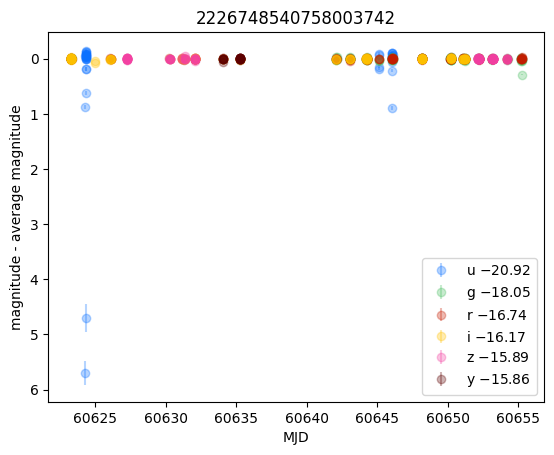

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.timeseries import LombScargleMultiband

COLORS = {'u': '#0c71ff', 'g': '#49be61', 'r': '#c61c00',
          'i': '#ffc200', 'z': '#f341a2', 'y': '#5d0000'}

lc = data.lc.query('psfFlux / psfFluxErr > 3 and ~psfFlux_flag')

mag = -2.5 * np.log10(lc['psfFlux']) + 31.4
magerr = 2.5 / np.log(10) * lc['psfFluxErr'] / lc['psfFlux']

plt.figure()
for b in 'ugrizy':
    i = lc['band'] == b
    if not np.any(i):
        continue
    mean_mag = np.average(mag[i], weights=1/magerr[i]**2)
    plt.errorbar(lc['midpointMJDTai'][i], mag[i] - mean_mag, magerr[i], fmt="o", alpha=0.3, color=COLORS[b], label=f'{b} $-${mean_mag:.2f}')
plt.gca().invert_yaxis()
plt.title(f'{OID}')
# plt.xlim(60640.19, 60640.20)
plt.xlabel('MJD')
plt.ylabel('magnitude - average magnitude')
plt.legend()

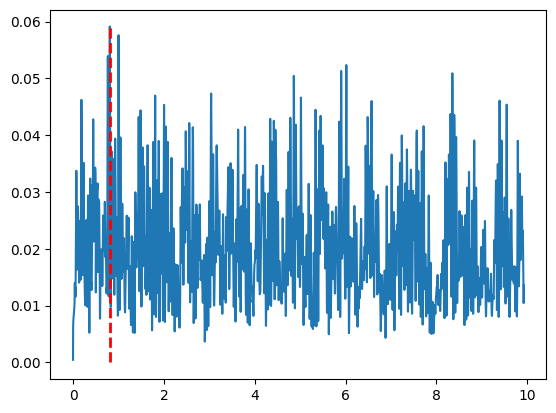

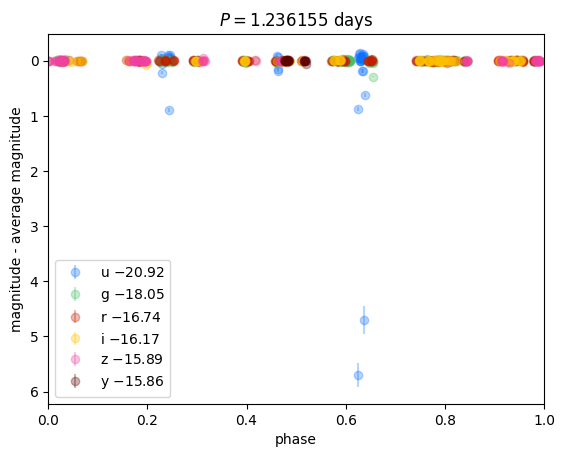

In [17]:
def extract_period_multiband_astropy(band, t, y, yerr, plot=True):
    freq, power = LombScargleMultiband(t, y, band, yerr).autopower(samples_per_peak=3000, nyquist_factor=1)
    idx_period = np.argmax(power)
    period = 1 / freq[idx_period]
    
    if plot:
        plt.plot(freq, power)
        plt.vlines(1/period, 0, power.max(), lw=2, ls='--', color='red')
    
    return period

period = extract_period_multiband_astropy(lc['band'], lc['midpointMJDTai'], mag, magerr)
# period = extract_period_multiband_astropy(lc['band'], lc['midpointMJDTai'], lc['psfFlux'], lc['psfFluxErr'])

phase = lc['midpointMJDTai'] % period / period

plt.figure()
for b in 'ugrizy':
    i = lc['band'] == b
    mean_mag = np.average(mag[i], weights=1/magerr[i]**2)
    plt.errorbar(phase[i], mag[i] - mean_mag, magerr[i], fmt="o", alpha=0.3, color=COLORS[b], label=f'{b} $-${mean_mag:.2f}')
plt.gca().invert_yaxis()
plt.title(f'$P = {period:.6f}$ days')
plt.xlim(0, 1)
plt.xlabel('phase')
plt.ylabel('magnitude - average magnitude')
plt.legend()

In [10]:
data.lc.query("band == 'u'").sort_values("psfFlux").iloc[:5]

,forcedSourceId,parentObjectId,coord_ra,coord_dec,visit,detector,band,psfFlux,psfFluxErr,psfFlux_flag,psfDiffFlux,psfDiffFluxErr,psfDiffFlux_flag,localPhotoCalib,localPhotoCalib_flag,localPhotoCalibErr,localWcs_flag,localWcs_CDMatrix_2_1,localWcs_CDMatrix_1_1,localWcs_CDMatrix_1_2,localWcs_CDMatrix_2_2,localBackground_instFlux,localBackground_instFluxErr,pixelFlags_edge,pixelFlags_interpolated,pixelFlags_saturated,pixelFlags_cr,pixelFlags_bad,pixelFlags_suspect,pixelFlags_interpolatedCenter,pixelFlags_saturatedCenter,pixelFlags_crCenter,pixelFlags_suspectCenter,invalidPsfFlag,tract,patch,detect_isPrimary,detect_isTractInner,detect_isPatchInner,midpointMJDTai,psfMag,psfMagErr,Norder,Dir,Npix
61,190910612346244393,0,53.211946,-28.201129,2024110900195,3,u,82.024536,16.612121,False,-17.592587,18.697226,False,1.0,False,0.004379,False,9.478370e-07,2.123799e-07,9.477527e-07,-2.122962e-07,0.173722,32.802790,False,False,False,False,False,False,False,False,False,False,False,5063,4,False,True,True,60624.306260,26.615141,0.222973,10,9190000,9199406
69,190910637042306058,0,53.211946,-28.201129,2024110900218,3,u,204.366806,47.756377,False,23.308399,53.259243,False,1.0,False,0.004583,False,9.477590e-07,2.121933e-07,9.478485e-07,-2.122464e-07,-0.239625,31.844096,False,False,False,False,False,False,False,False,False,False,False,5063,4,False,True,True,60624.321441,25.623974,0.258490,10,9190000,9199406
628,191684656742008265,0,53.211946,-28.201129,2024120100184,8,u,6848.890524,261.008395,False,565.920142,287.303851,False,1.0,False,0.002152,False,-9.703256e-07,4.063432e-08,-9.702985e-07,-4.060944e-08,0.305147,35.910582,False,False,False,False,False,False,False,False,False,False,False,5063,4,False,True,True,60646.086433,21.810949,0.041397,10,9190000,9199406
149,190910613424177160,0,53.211946,-28.201129,2024110900196,4,u,6927.282569,252.331614,False,88.253021,277.590750,False,1.0,False,0.002541,False,9.480130e-07,2.112125e-07,9.480388e-07,-2.110215e-07,0.525429,27.292334,False,False,False,False,False,False,False,False,False,False,False,5063,4,False,True,True,60624.306836,21.798593,0.039566,10,9190000,9199406
430,190910640276114473,0,53.211946,-28.201129,2024110900221,6,u,8827.216159,303.509805,False,-110.207506,332.334505,False,1.0,False,0.003667,False,9.481147e-07,2.111848e-07,9.481421e-07,-2.115366e-07,-1.594068,33.500922,False,False,False,False,False,False,False,False,False,False,False,5063,4,False,True,True,60624.323194,21.535441,0.037346,10,9190000,9199406


In [25]:
for_neven = data.lc.query("band == 'u'").sort_values("psfFlux").iloc[[0, 2]]
print(for_neven.loc[:, for_neven.nunique() > 1].astype(object).T)

                                            61                  628
forcedSourceId               190910612346244393  191684656742008265
visit                             2024110900195       2024120100184
detector                                      3                   8
psfFlux                               82.024536         6848.890524
psfFluxErr                            16.612121          261.008395
psfDiffFlux                          -17.592587          565.920142
psfDiffFluxErr                        18.697226          287.303851
localPhotoCalibErr                     0.004379            0.002152
localWcs_CDMatrix_2_1                  0.000001           -0.000001
localWcs_CDMatrix_1_1                       0.0                 0.0
localWcs_CDMatrix_1_2                  0.000001           -0.000001
localWcs_CDMatrix_2_2                      -0.0                -0.0
localBackground_instFlux               0.173722            0.305147
localBackground_instFluxErr            32.80279 

In [13]:
6848.890524 / 82.024536

83.49807091868219